# Problema 8.16

In [61]:
using SymPy, Plots, LaTeXStrings, DSP, Roots, Interpolations

t, w, td = symbols("t omega td", real=true)
@vars s

function bode(Gol; wmin=1e-1, wmax=1e1, points=100, stab=false)
    Gw = Gol(s=>im*w)

    RAol = sqrt(real(Gw)^2+imag(Gw)^2)
    phiol = sympy.atan2(imag(Gw), real(Gw))

    wlog = range(log10(wmin), log10(wmax); length=points)
    wlin = 10 .^wlog
    philam = lambdify(phiol)
    phidata = philam.(wlin)
    DSP.unwrap!(phidata)

    
    if stab
        itp = LinearInterpolation(wlin,phidata)
        f(x) = itp(x)+pi
        wco = find_zero(f, (wmin, wlin[end]))
        RAco = RAol(wco)
        phico = itp(wco)

    end

    l = @layout [a; b]
    RAplot = plot(RAol, wmin, wmax, xscale=:log10, yscale=:log10,
        legend=false, lw=2, xlabel="", ylabel="RA",
        minorticks=:auto)
    RAminscale = ylims(RAplot)[1]
    if stab
        plot!([wmin, wco, wco],[RAco, RAco, RAminscale], color=:red, 
            annotations= (wco, float(RAco), text(L"w_{co}, RA_{co}", pointsize=10, :left)))

    end
    phiplot = plot(wlin, phidata*180/pi, xscale=:log10,
        legend=false, lw=2, xlabel="ω", ylabel="φ",
        minorticks=:auto)
    phiminscale = ylims(phiplot)[1]
    if stab
        plot!([wmin, wco, wco],[phico*180/pi, phico*180/pi, phiminscale],
            color=:red, annotations= (wco ,float(phico*180/pi), text(L"w_{co}, -180\degree",
                    pointsize=10, :left)))

    end

    display(plot(RAplot, phiplot, layout=l))
    if stab
        return wco, RAco, phico
    end
end

bode (generic function with 1 method)

In [62]:
Gol = 1/(0.5s+1)*exp(-td*s)

   -s⋅td 
  ℯ      
─────────
0.5⋅s + 1

In [63]:
Gol(td=>.01)

  -0.01⋅s
 ℯ       
─────────
0.5⋅s + 1

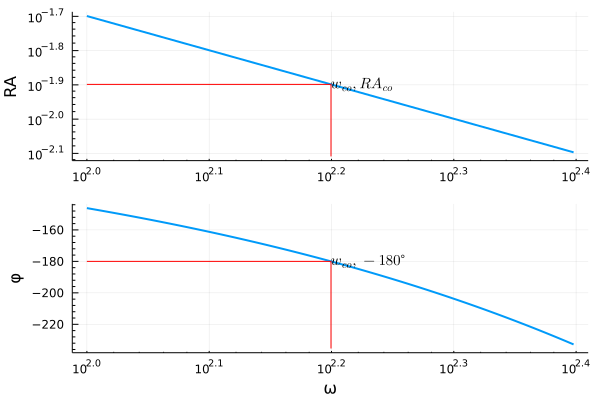

(158.34267333886166, 0.0126298264324675, -3.141592653589793)

In [64]:
bode(Gol(td=>0.01); wmin=100, wmax=250, stab=true, points=100)

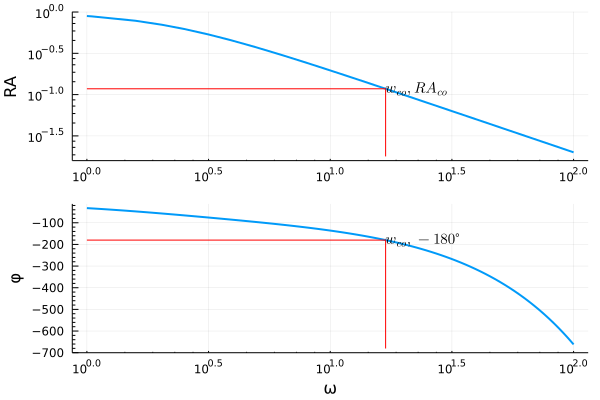

(16.887252004838693, 0.117610584794211, -3.141592653589793)

In [65]:
bode(Gol(td=>0.1); wmin=1, wmax=100, stab=true, points=100)

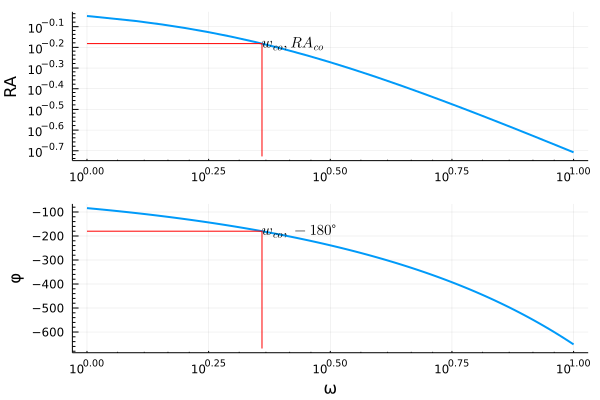

(2.288959596389207, 0.657975335715426, -3.141592653589793)

In [68]:
bode(Gol(td=>1); wmin=1, wmax=10, stab=true, points=100)